In [1]:
library(MASS)
library(lmtest)
library(gridExtra)
library(zoo)
library(ggcorrplot)
library(tidyverse)
library(readxl)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: ggplot2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   1.0.0     ✔ dplyr   0.8.3
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::select()  masks MASS::select()


# Sections 1 and 2

In [2]:
original_df <- readxl::read_xlsx("S14 UDJ Harmon.xlsx")

In [3]:
original_df

TIME,Sales,CP,CP(t-1),CP(t-2),DA,DA(t-1),DA(t-2),SeasIndx
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,425075,75253,0,0,457732,352872,304004,113
2,315305,15036,75253,0,254396,457732,352872,98
3,367286,134440,15036,75253,259952,254396,457732,102
4,429432,119740,134440,15036,267368,259952,254396,107
5,347874,135590,119740,134440,158504,267368,259952,119
6,435529,189636,135590,119740,430012,158504,267368,104
7,299403,9308,189636,135590,388516,430012,158504,107
8,296505,41099,9308,189636,225616,388516,430012,81
9,426701,9391,41099,9308,1042304,225616,388516,113


In [4]:
summary(original_df)

      TIME           Sales              CP            CP(t-1)      
 Min.   : 1.00   Min.   :166391   Min.   :   157   Min.   :     0  
 1st Qu.:12.75   1st Qu.:298678   1st Qu.:  8466   1st Qu.:  5890  
 Median :24.50   Median :371928   Median : 38959   Median : 32284  
 Mean   :24.50   Mean   :382522   Mean   :100953   Mean   : 99456  
 3rd Qu.:36.25   3rd Qu.:437748   3rd Qu.:125790   3rd Qu.:125790  
 Max.   :48.00   Max.   :744583   Max.   :548704   Max.   :548704  
    CP(t-2)             DA             DA(t-1)           DA(t-2)       
 Min.   :     0   Min.   :      0   Min.   :      0   Min.   :      0  
 1st Qu.:  5688   1st Qu.: 108101   1st Qu.: 108101   1st Qu.: 108101  
 Median : 24818   Median : 297468   Median : 297468   Median : 297468  
 Mean   : 94569   Mean   : 497807   Mean   : 493647   Mean   : 492136  
 3rd Qu.:120532   3rd Qu.: 484386   3rd Qu.: 463019   3rd Qu.: 463019  
 Max.   :548704   Max.   :4869952   Max.   :4869952   Max.   :4869952  
    SeasIndx    
 Mi

In [5]:
str(original_df)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	48 obs. of  9 variables:
 $ TIME    : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Sales   : num  425075 315305 367286 429432 347874 ...
 $ CP      : num  75253 15036 134440 119740 135590 ...
 $ CP(t-1) : num  0 75253 15036 134440 119740 ...
 $ CP(t-2) : num  0 0 75253 15036 134440 ...
 $ DA      : num  457732 254396 259952 267368 158504 ...
 $ DA(t-1) : num  352872 457732 254396 259952 267368 ...
 $ DA(t-2) : num  304004 352872 457732 254396 259952 ...
 $ SeasIndx: num  113 98 102 107 119 104 107 81 113 97 ...


In [6]:
cor(select(original_df, -TIME))

,Sales,CP,CP(t-1),CP(t-2),DA,DA(t-1),DA(t-2),SeasIndx
Sales,1.000000000,0.48849998,-0.33516467,0.09349610,0.54199231,0.002475396,0.03673268,0.689601674
CP,0.488499982,1.00000000,-0.03569904,-0.19752915,-0.23542103,-0.191870454,0.26297438,0.325758588
CP(t-1),-0.335164666,-0.03569904,1.00000000,-0.02092965,-0.11458073,-0.231563542,-0.18827697,-0.113264886
CP(t-2),0.093496103,-0.19752915,-0.02092965,1.00000000,0.33180797,-0.114144865,-0.22699929,-0.045935206
DA,0.541992314,-0.23542103,-0.11458073,0.33180797,1.00000000,-0.042479316,-0.12844472,0.140494952
DA(t-1),0.002475396,-0.19187045,-0.23156354,-0.11414486,-0.04247932,1.000000000,-0.04160965,-0.006726525
DA(t-2),0.036732681,0.26297438,-0.18827697,-0.22699929,-0.12844472,-0.041609652,1.00000000,0.089478699
SeasIndx,0.689601674,0.32575859,-0.11326489,-0.04593521,0.14049495,-0.006726525,0.08947870,1.000000000


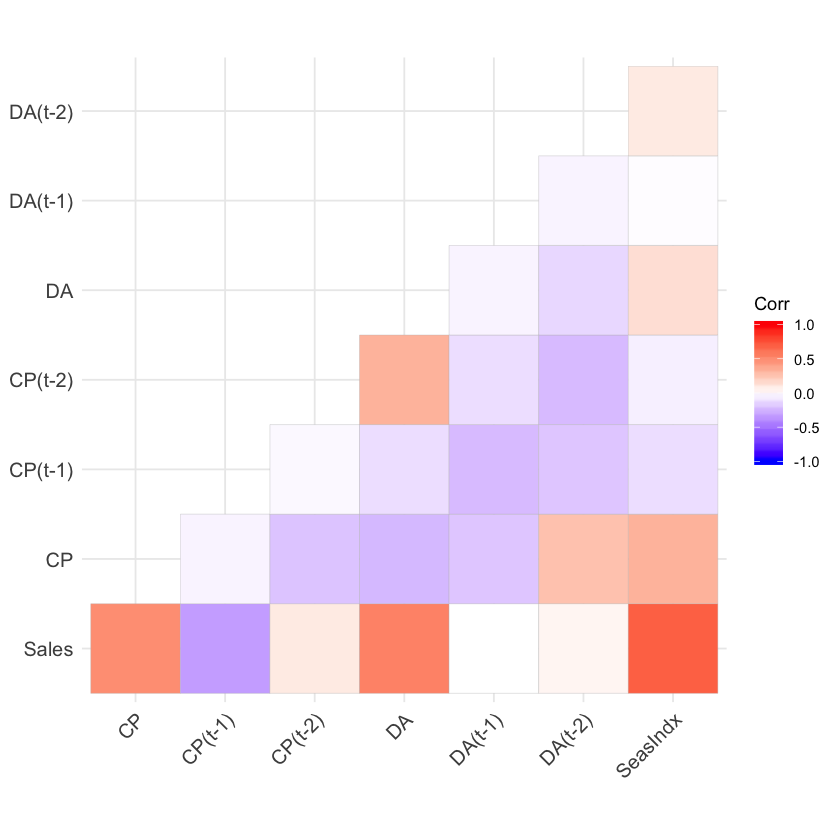

In [7]:
ggcorrplot(cor(select(original_df, -TIME)), type="lower")

In [8]:
sum(original_df$Sales[1:12])/12

[1] 343417.2

In [9]:
zoo::rollmeanr(original_df$Sales, 12)

[1] 343417.2 360444.6 356124.8 358710.9 354305.7 362349.8 358304.6 367880.5
 [9] 364296.2 369101.5 367123.8 369925.8 371291.8 373487.2 374071.8 371300.0
[17] 366013.8 372997.7 372403.5 377215.5 377300.8 382883.2 385369.6 385786.3
[25] 393629.4 376911.8 375002.3 396431.2 406114.2 399859.7 394880.2 393190.3
[33] 392770.8 408873.2 415986.6 422399.8 421749.4

Warning message:
“Removed 11 rows containing missing values (geom_path).”

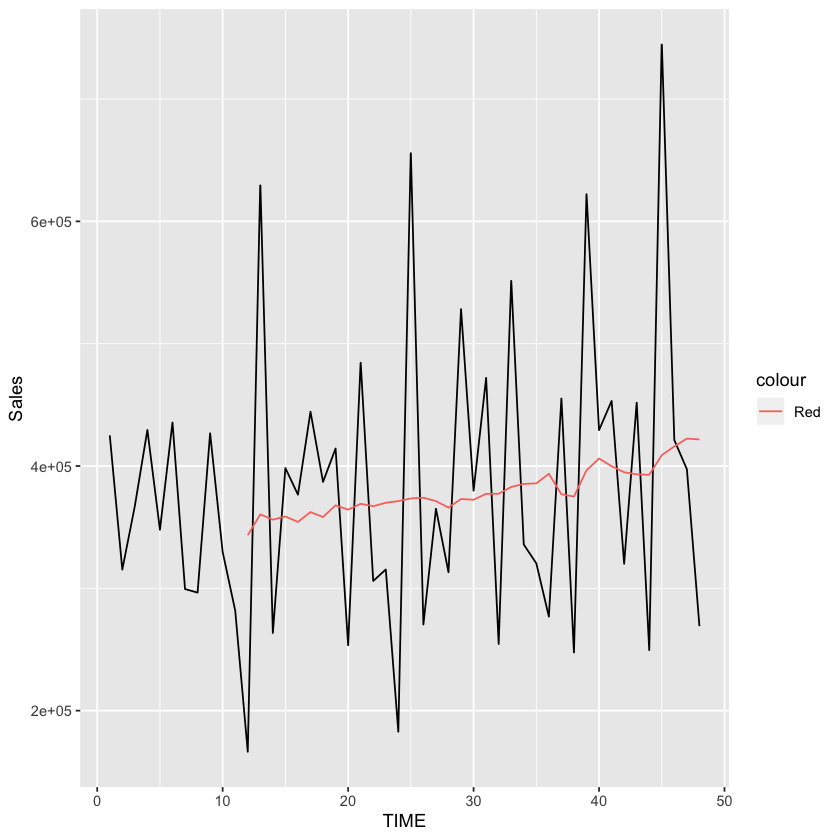

In [10]:
ggplot(data=original_df, aes(x=TIME, y=Sales)) + geom_line() + 
    geom_line(aes(y=zoo::rollmeanr(Sales, 12, na.pad=TRUE), colour="Red"))

In [11]:
model1 <- lm(Sales ~ . , data=select(original_df, -TIME))

In [12]:
summary(model1)


Call:
lm(formula = Sales ~ ., data = select(original_df, -TIME))

Residuals:
   Min     1Q Median     3Q    Max 
-90159 -22383   2405  21306 105537 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.216e+04  4.045e+04  -1.042 0.303460    
CP           4.497e-01  4.492e-02  10.012 1.87e-12 ***
`CP(t-1)`   -1.752e-01  4.087e-02  -4.287 0.000111 ***
`CP(t-2)`    8.305e-03  4.219e-02   0.197 0.844940    
DA           7.507e-02  6.562e-03  11.439 3.48e-14 ***
`DA(t-1)`    1.043e-02  6.277e-03   1.662 0.104327    
`DA(t-2)`   -1.289e-02  6.303e-03  -2.045 0.047486 *  
SeasIndx     3.594e+03  4.075e+02   8.822 6.31e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36750 on 40 degrees of freedom
Multiple R-squared:  0.9217,	Adjusted R-squared:  0.908 
F-statistic: 67.29 on 7 and 40 DF,  p-value: < 2.2e-16


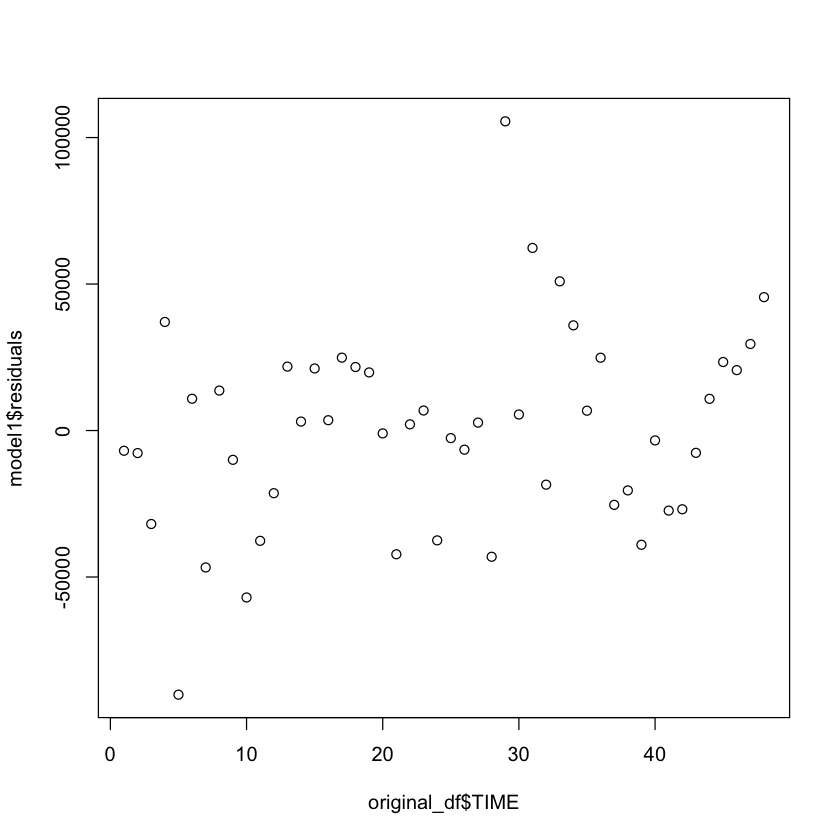

In [13]:
plot(original_df$TIME, model1$residuals)

In [14]:
dwtest(model1)


	Durbin-Watson test

data:  model1
DW = 2.0172, p-value = 0.5163
alternative hypothesis: true autocorrelation is greater than 0


In [15]:
model2 <- lm(Sales ~ CP + `CP(t-1)` + DA + `DA(t-2)` + SeasIndx, data=select(original_df, -TIME))

In [16]:
summary(model2)


Call:
lm(formula = Sales ~ CP + `CP(t-1)` + DA + `DA(t-2)` + SeasIndx, 
    data = select(original_df, -TIME))

Residuals:
   Min     1Q Median     3Q    Max 
-92569 -24519   1768  20618  97250 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.589e+04  4.014e+04  -0.894   0.3764    
CP           4.325e-01  4.399e-02   9.830 1.87e-12 ***
`CP(t-1)`   -1.931e-01  3.976e-02  -4.856 1.70e-05 ***
DA           7.392e-02  6.306e-03  11.722 7.95e-15 ***
`DA(t-2)`   -1.364e-02  6.245e-03  -2.184   0.0346 *  
SeasIndx     3.636e+03  4.098e+02   8.871 3.53e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37080 on 42 degrees of freedom
Multiple R-squared:  0.9163,	Adjusted R-squared:  0.9064 
F-statistic: 91.98 on 5 and 42 DF,  p-value: < 2.2e-16


In [17]:
dwtest(model2)


	Durbin-Watson test

data:  model2
DW = 2.026, p-value = 0.5346
alternative hypothesis: true autocorrelation is greater than 0


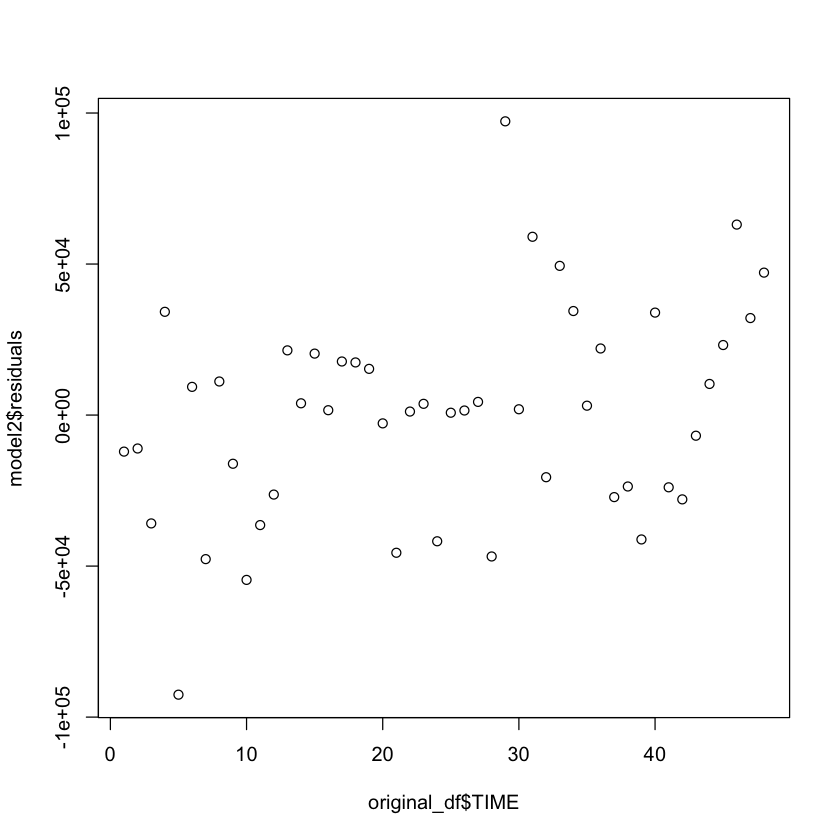

In [18]:
plot(original_df$TIME, model2$residuals)

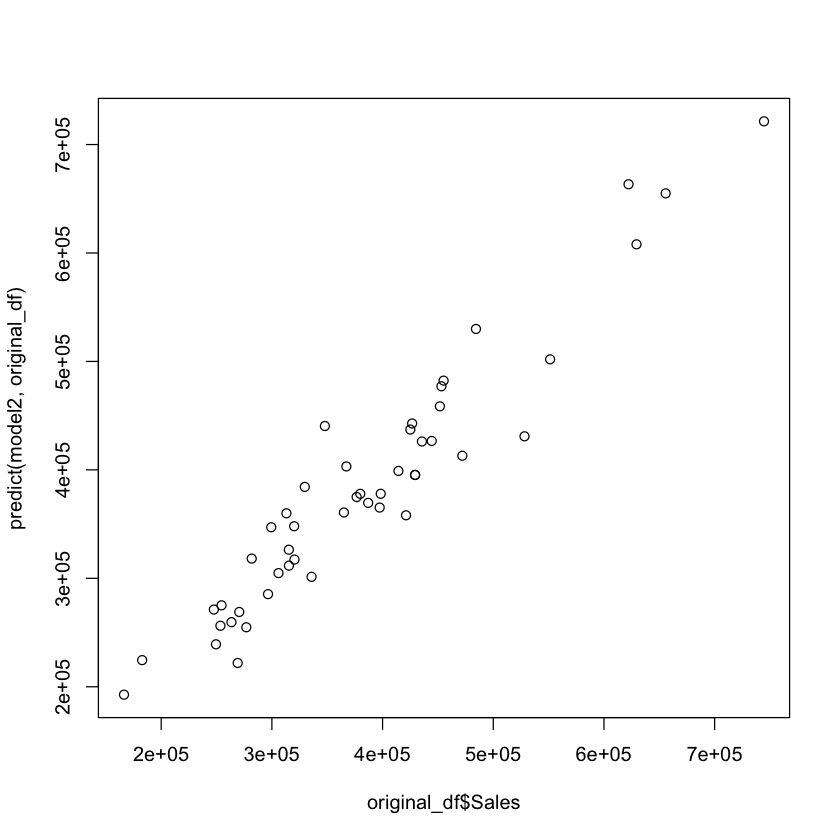

In [19]:
plot(original_df$Sales, predict(model2, original_df))

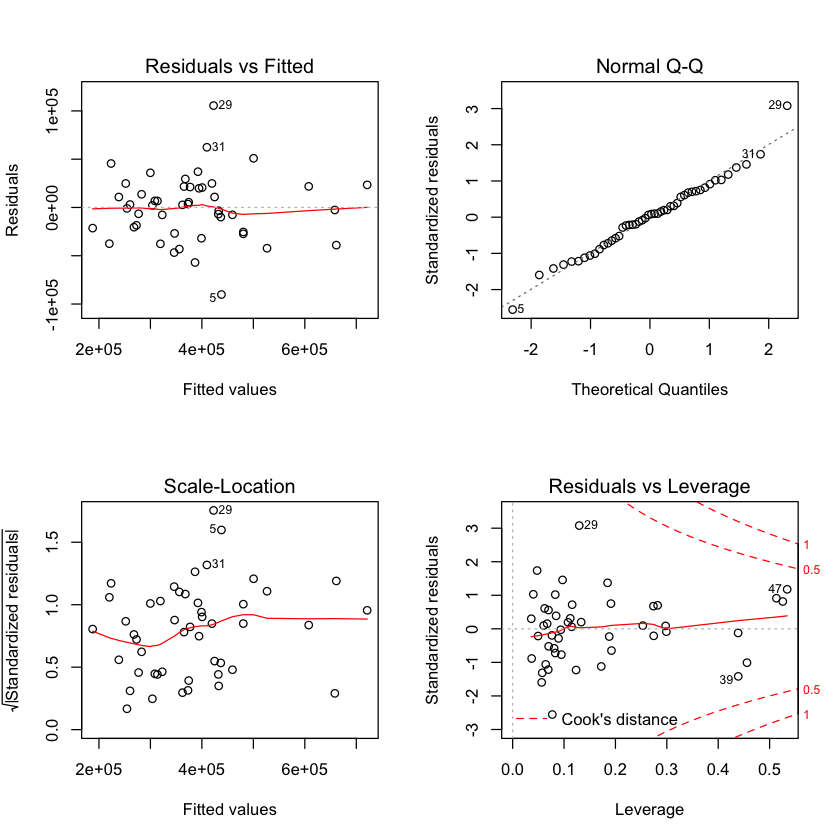

In [20]:
par(mfrow=c(2,2))
plot(model1)

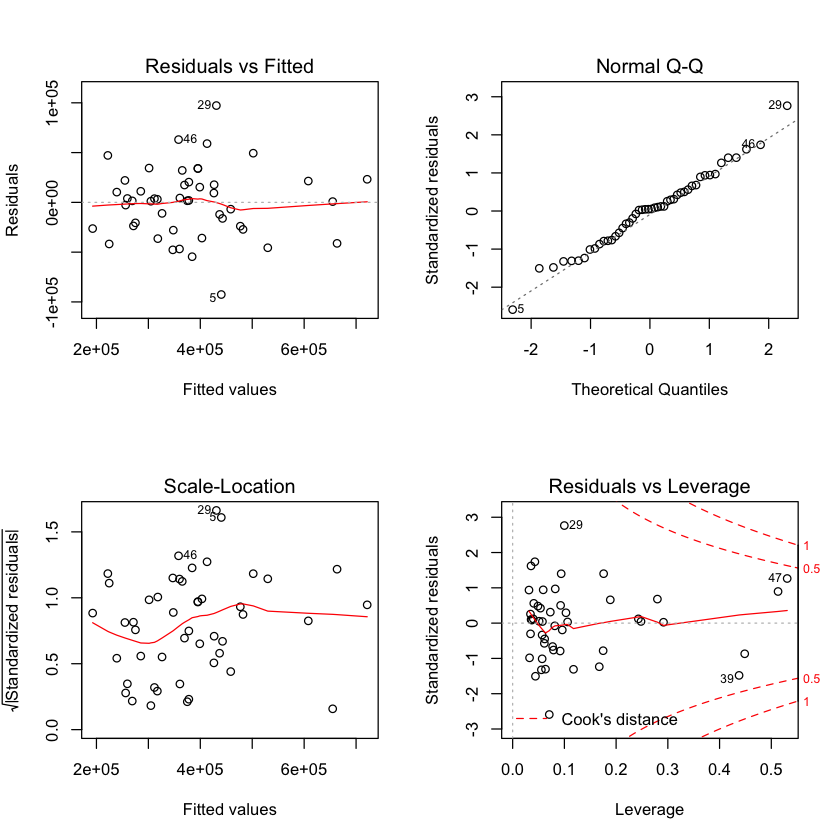

In [21]:
par(mfrow=c(2,2))
plot(model2)

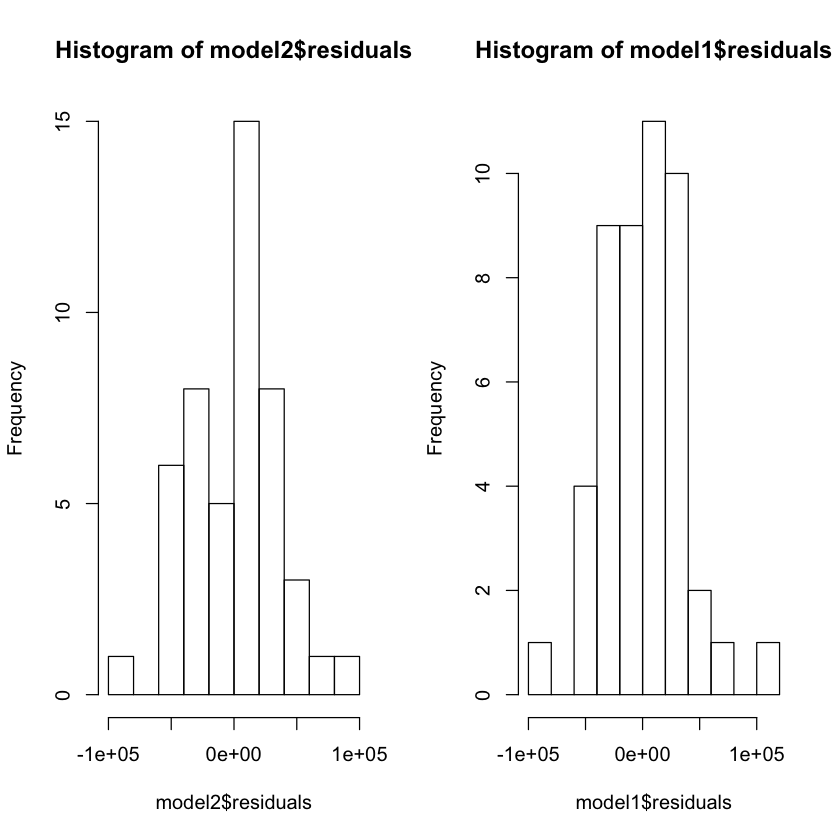

In [22]:
par(mfrow = c(1,2))
hist(model2$residuals)
hist(model1$residuals)

## Section 3  

For the next month, January 1988, the planned amount of Consumer Packs is
100 000 cases and Dealer Allowances are set at 500 000$. Use your model to
predict sales in January 1988. Please report a point estimate and a 95% prediction
interval.

In [23]:
tail(original_df)

TIME,Sales,CP,CP(t-1),CP(t-2),DA,DA(t-1),DA(t-2),SeasIndx
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
43,451779,315564,178105,333529,46104,0,0,107
44,249482,80206,315564,178105,92252,46104,0,81
45,744583,5940,80206,315564,4869952,92252,46104,113
46,421186,36819,5940,80206,376556,4869952,92252,97
47,397367,234562,36819,5940,376556,376556,4869952,95
48,269096,71881,234562,36819,552536,376556,376556,65


In [24]:
# ?predict.lm

In [25]:
summary(model2)


Call:
lm(formula = Sales ~ CP + `CP(t-1)` + DA + `DA(t-2)` + SeasIndx, 
    data = select(original_df, -TIME))

Residuals:
   Min     1Q Median     3Q    Max 
-92569 -24519   1768  20618  97250 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.589e+04  4.014e+04  -0.894   0.3764    
CP           4.325e-01  4.399e-02   9.830 1.87e-12 ***
`CP(t-1)`   -1.931e-01  3.976e-02  -4.856 1.70e-05 ***
DA           7.392e-02  6.306e-03  11.722 7.95e-15 ***
`DA(t-2)`   -1.364e-02  6.245e-03  -2.184   0.0346 *  
SeasIndx     3.636e+03  4.098e+02   8.871 3.53e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37080 on 42 degrees of freedom
Multiple R-squared:  0.9163,	Adjusted R-squared:  0.9064 
F-statistic: 91.98 on 5 and 42 DF,  p-value: < 2.2e-16


In [26]:
summary(model2)$sigma

[1] 37080.34

In [27]:
cp = 100000
da = 500000
cp_lag1 = 71881
da_lag2 = 376556
seasindex = 113

In [28]:
 -3.589e+04 + (4.325e-01*cp)  + (-1.931e-01*cp_lag1) + (7.392e-02*da) + (-1.364e-02*da_lag2) + (3.636e+03*seasindex)

[1] 436171.6

In [29]:
1.96 * 37080.3429721249

[1] 72677.47

In [30]:
436171.55506 - 72677.4722253648

[1] 363494.1

In [31]:
436171.55506 + 72677.4722253648

[1] 508849

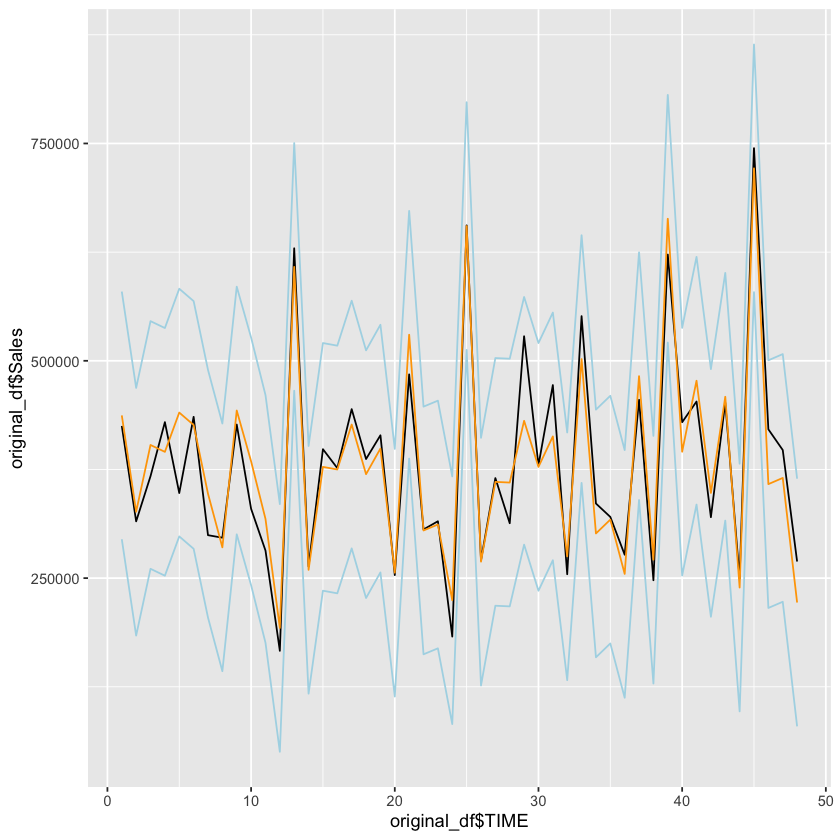

In [32]:
ggplot(data=original_df, aes(original_df$TIME, original_df$Sales)) + geom_line() + 
    geom_line(aes(y=predict(model2, original_df)), color="orange") + 
    geom_line(aes(y=predict(model2, original_df) + 1.96 * 72677.4722253648), color="lightblue") + 
    geom_line(aes(y=predict(model2, original_df) - 1.96 * 72677.4722253648), color="lightblue") 

## Section 4

In [33]:
summary(model2)


Call:
lm(formula = Sales ~ CP + `CP(t-1)` + DA + `DA(t-2)` + SeasIndx, 
    data = select(original_df, -TIME))

Residuals:
   Min     1Q Median     3Q    Max 
-92569 -24519   1768  20618  97250 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.589e+04  4.014e+04  -0.894   0.3764    
CP           4.325e-01  4.399e-02   9.830 1.87e-12 ***
`CP(t-1)`   -1.931e-01  3.976e-02  -4.856 1.70e-05 ***
DA           7.392e-02  6.306e-03  11.722 7.95e-15 ***
`DA(t-2)`   -1.364e-02  6.245e-03  -2.184   0.0346 *  
SeasIndx     3.636e+03  4.098e+02   8.871 3.53e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37080 on 42 degrees of freedom
Multiple R-squared:  0.9163,	Adjusted R-squared:  0.9064 
F-statistic: 91.98 on 5 and 42 DF,  p-value: < 2.2e-16


## Section 5

In [34]:
# dealer allowances